<a href="https://colab.research.google.com/github/mateus0205/Atividade4/blob/main/Atividade4_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicação de Redes Neurais Artificiais na Previsão do Diagnóstico de Transtorno do Espectro Autista"

* Lucas Pessoa Oliveira Alves 2022.1.08.044
* Mateus Henrique Martins 2020.1.08.022


---


O diagnóstico precoce do Transtorno do Espectro Autista (TEA) desempenha um papel essencial na melhora da qualidade de vida dos indivíduos e de suas famílias. Quando o diagnóstico é feito nas fases iniciais, é possível implementar intervenções mais eficazes e personalizadas, que contribuem para o desenvolvimento de habilidades sociais, comunicativas e cognitivas, promovendo uma maior adaptação e autonomia. Estudos mostram que as intervenções de estratégias de enfrentamento que reduzem os impactos negativos do TEA no dia a dia.

No entanto, o processo de diagnóstico de autismo ainda enfrenta desafios devido à variabilidade dos sintomas e à complexidade do transtorno. A análise baseada apenas em avaliações clínicas pode ser demorada e sujeita a subjetividades, o que destaca a necessidade de abordagens complementares para tornar o diagnóstico mais preciso e acessível. Nesse contexto, as Redes Neurais Artificias (RNAs) emergem como ferramentas promissoras, capazes de identificar padrões complexos em grandes conjuntos de dados e de auxiliar na previsão de diagnósticos de forma atualizada. O uso de RNAs no diagnóstico do TEA pode não apenas acelerar o processo, mas também apoiar profissionais da saíde a tomar decisões mais informadas e a desenvolver planos de tratamento mais direcionados e personalizados.

Este trabalho tem como objetivo a exploração a aplicação de Redes Neurais Artificiais para a previsão do diagnóstico de autismo, analisando a eficácia dessa abordagem e seu potencial impacto na melhoria do processo de diagnóstico e no desenvolvimento de tratamentos mais adaptados às necessidades individuais.

<p align=center>
  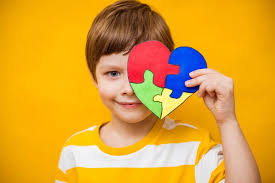
  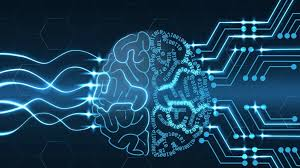
<p>

A base de dados utilizada, foi do autismo em pessoas adultas, conhecida como [**Autism Screening on Adults.**](https://www.kaggle.com/datasets/andrewmvd/autism-screening-on-adults/code)

A base Autism Screening on Adults contém 704 Instâncias e 21 atributos, que serão apresentados a seguir:

<table border="1" style="text-align: center;">
  <tr><td>A1_Score</td></tr>
  <tr><td>A2_Score</td></tr>
  <tr><td>A3_Score</td></tr>
  <tr><td>A4_Score</td></tr>
  <tr><td>A5_Score</td></tr>
  <tr><td>A6_Score</td></tr>
  <tr><td>A7_Score</td></tr>
  <tr><td>A8_Score</td></tr>
  <tr><td>A9_Score</td></tr>
  <tr><td>A10_Score</td></tr>
  <tr><td>age</td></tr>
  <tr><td>gender</td></tr>
  <tr><td>ethnicity</td></tr>
  <tr><td>jundice</td></tr>
  <tr><td>austim</td></tr>
  <tr><td>contry_of_res</td></tr>
  <tr><td>used_app_before</td></tr>
  <tr><td>result</td></tr>
  <tr><td>age_desc</td></tr>
  <tr><td>relation</td></tr>
  <tr><td>Class/ASD</td></tr>
</table>



distribuída#Importação das bibliotecas Python
Nossos experimentos utilizarão a linguagem de programação Python. Para a realização das tarefas de Análise Exploratória de Dados (EDA), existem várias bibliotecas em Python que simplificam o desenvolvimento de gráficos e a obtenção de informações a partir dos dados.

Dentre as inúmeras bibliotecas disponíveis, merecem destaque as seguintes:

1.   [**Pandas**](https://pandas.pydata.org/): Biblioteca Python para manipulação e análise de dados. Oferece estruturas e operações para manipular tabelas e séries temporais. É um software livre com licença tipo BSD.
2.   [**Matplotlib**](https://matplotlib.org/): Biblioteca Python para visualização de dados, também é distribuída com licença de software tipo BSD.
3. [**Seaborn**](https://github.com/mwaskom/seaborn): É uma biblioteca Python também com licença tipo BSD utilizada para visualização de dados em alto nível. Trabalha com a biblioteca **Matplotlib** e possui integração com as estruturas da biblioteca **Pandas**.
4.  [**Scikit-learn**](https://scikit-learn.org/stable/) Biblioteca Python de código aberto, amplamente utilizada para aprendizado de máquina e análise preditiva. Oferece ferramentas eficientes para modelagem e avaliação de modelos, incluindo divisão de dados em conjuntos de treino e teste, normalização, algoritmos de classificação e métricas de avaliação.
5.  [**TensorFlow/Keras**](https://www.tensorflow.org/?hl=pt-br) TensorFlow é uma plataforma de código aberto para aprendizado de máquina, enquanto o Keras é uma biblioteca de alto nível integrada ao TensorFlow. Keras permite a criação de redes neurais com uma interface simples e eficiente. As funcionalidades de Keras incluem definição de camadas, otimizadores, regularizadores e callbacks, como a parada antecipada (EarlyStopping), úteis para controlar o treinamento.

In [ ]:
# Importação de bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import ConfusionMatrixDisplay


Este código foi usado para carregar e inspensar o código de maneira inicial no dataset autism_screening.csv, para entender melhor a estrutura e as carascterísticas dos dados antes de iniciar a Análise Exploratória de dados e a criação de modelos de aprendizado de máquina.

O método *.head()* foi usado para exibir as cinco primeiras linhas do DataFrame data. Utilizado para vizualizar os formatos dos dados, a estrutura das colunas e os tipos de valores que o dataset contém, permitindo identificar colunas importantes e dados ausentes logo no início.

O método .*info()* informa informações importantes, exibe número de entradas, nome e tipo de cada coluna, a contagem de valores são nulos em cada coluna.

O método *.describe()* gera estatísticas descritivas para colunas numéricas, incluindo, média, desvião padrão, valores minímos, máximo e quartis.


In [ ]:
# Carregar o dataset "autism_screening.csv"
data = pd.read_csv('/content/autism_screening.csv')
display(data.head())
display(data.info())
display(data.describe())


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

None

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


## Correlação e Pairplot


Esse trecho de código calcula e visualiza a correlação entre as variáveis numéricas do dataset, ele também exibe a distribuição das variáveis principais em relação a variável alvo **(CLASS/ASD)**, ajudando a identificar relações entre as variáveis e padrões relevantes para análise preditiva.

Começa filtrando as colunas numéricas e selecionar apenas colunas numéricas do DataFrame data. isso facilita o calculo da correlação, focando apenas em variáveis quantitativas que possuem relações diretas.

A correlação mede a relação linear entre as variáveis numéricas. Quando estamos construindo um modelo de diagnóstico, entender essas relações pode ser muito útil para selecionar variáveis que contribuam mais para prever o desfecho (neste caso, a presença ou ausência de autismo).


*   Identificação de variáveis fortemente relacionadas com diagnóstico
*  Remoção das variáveis redundantes.
* Melhoria da interpetação

o pairplot permite vizualizar a distribuição das variáveis e as relações entre elas, o que ajuda a entender como diferente classes (autismo presente ou não) se distribuiem em relação às variáveis principais.

* Identificação de padrões visuais entre classes
* Exploração de relações não lineares
* verificação de outliers e distribuição de dados

Essas análises não apenas ajudam a selecionar variáveis importantes, mas também melhoram a comprreensão dos dados e interpretabilidade do modelo. Isso é especialmente em contextos de saúde, onde o entedimento dos fatores que contribuem para um diagnóstico é tão importante quanto a precisão do modelo.


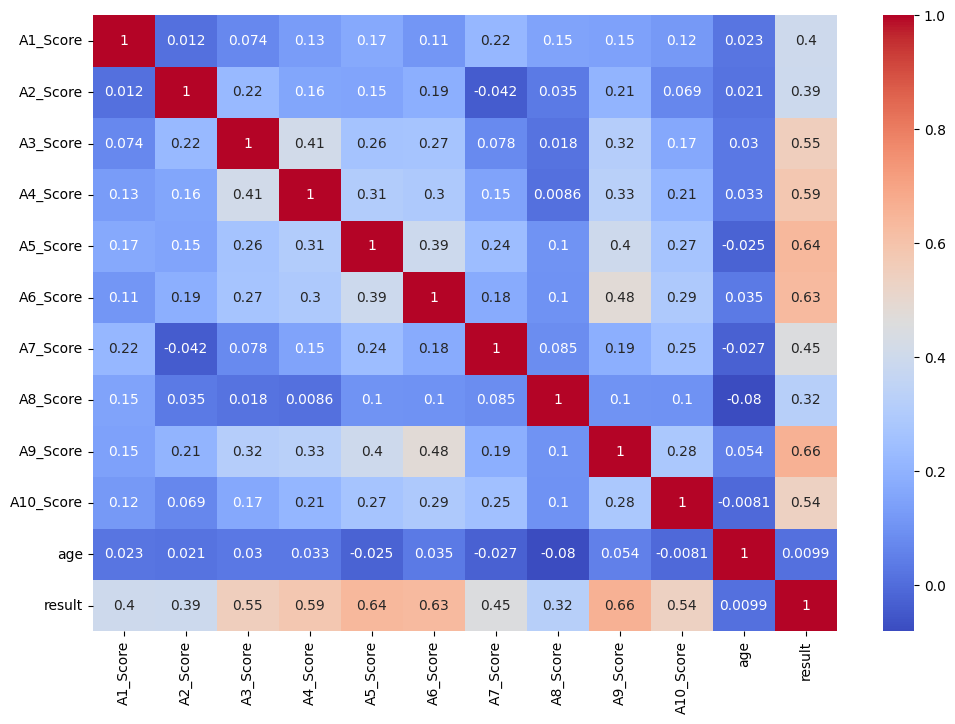

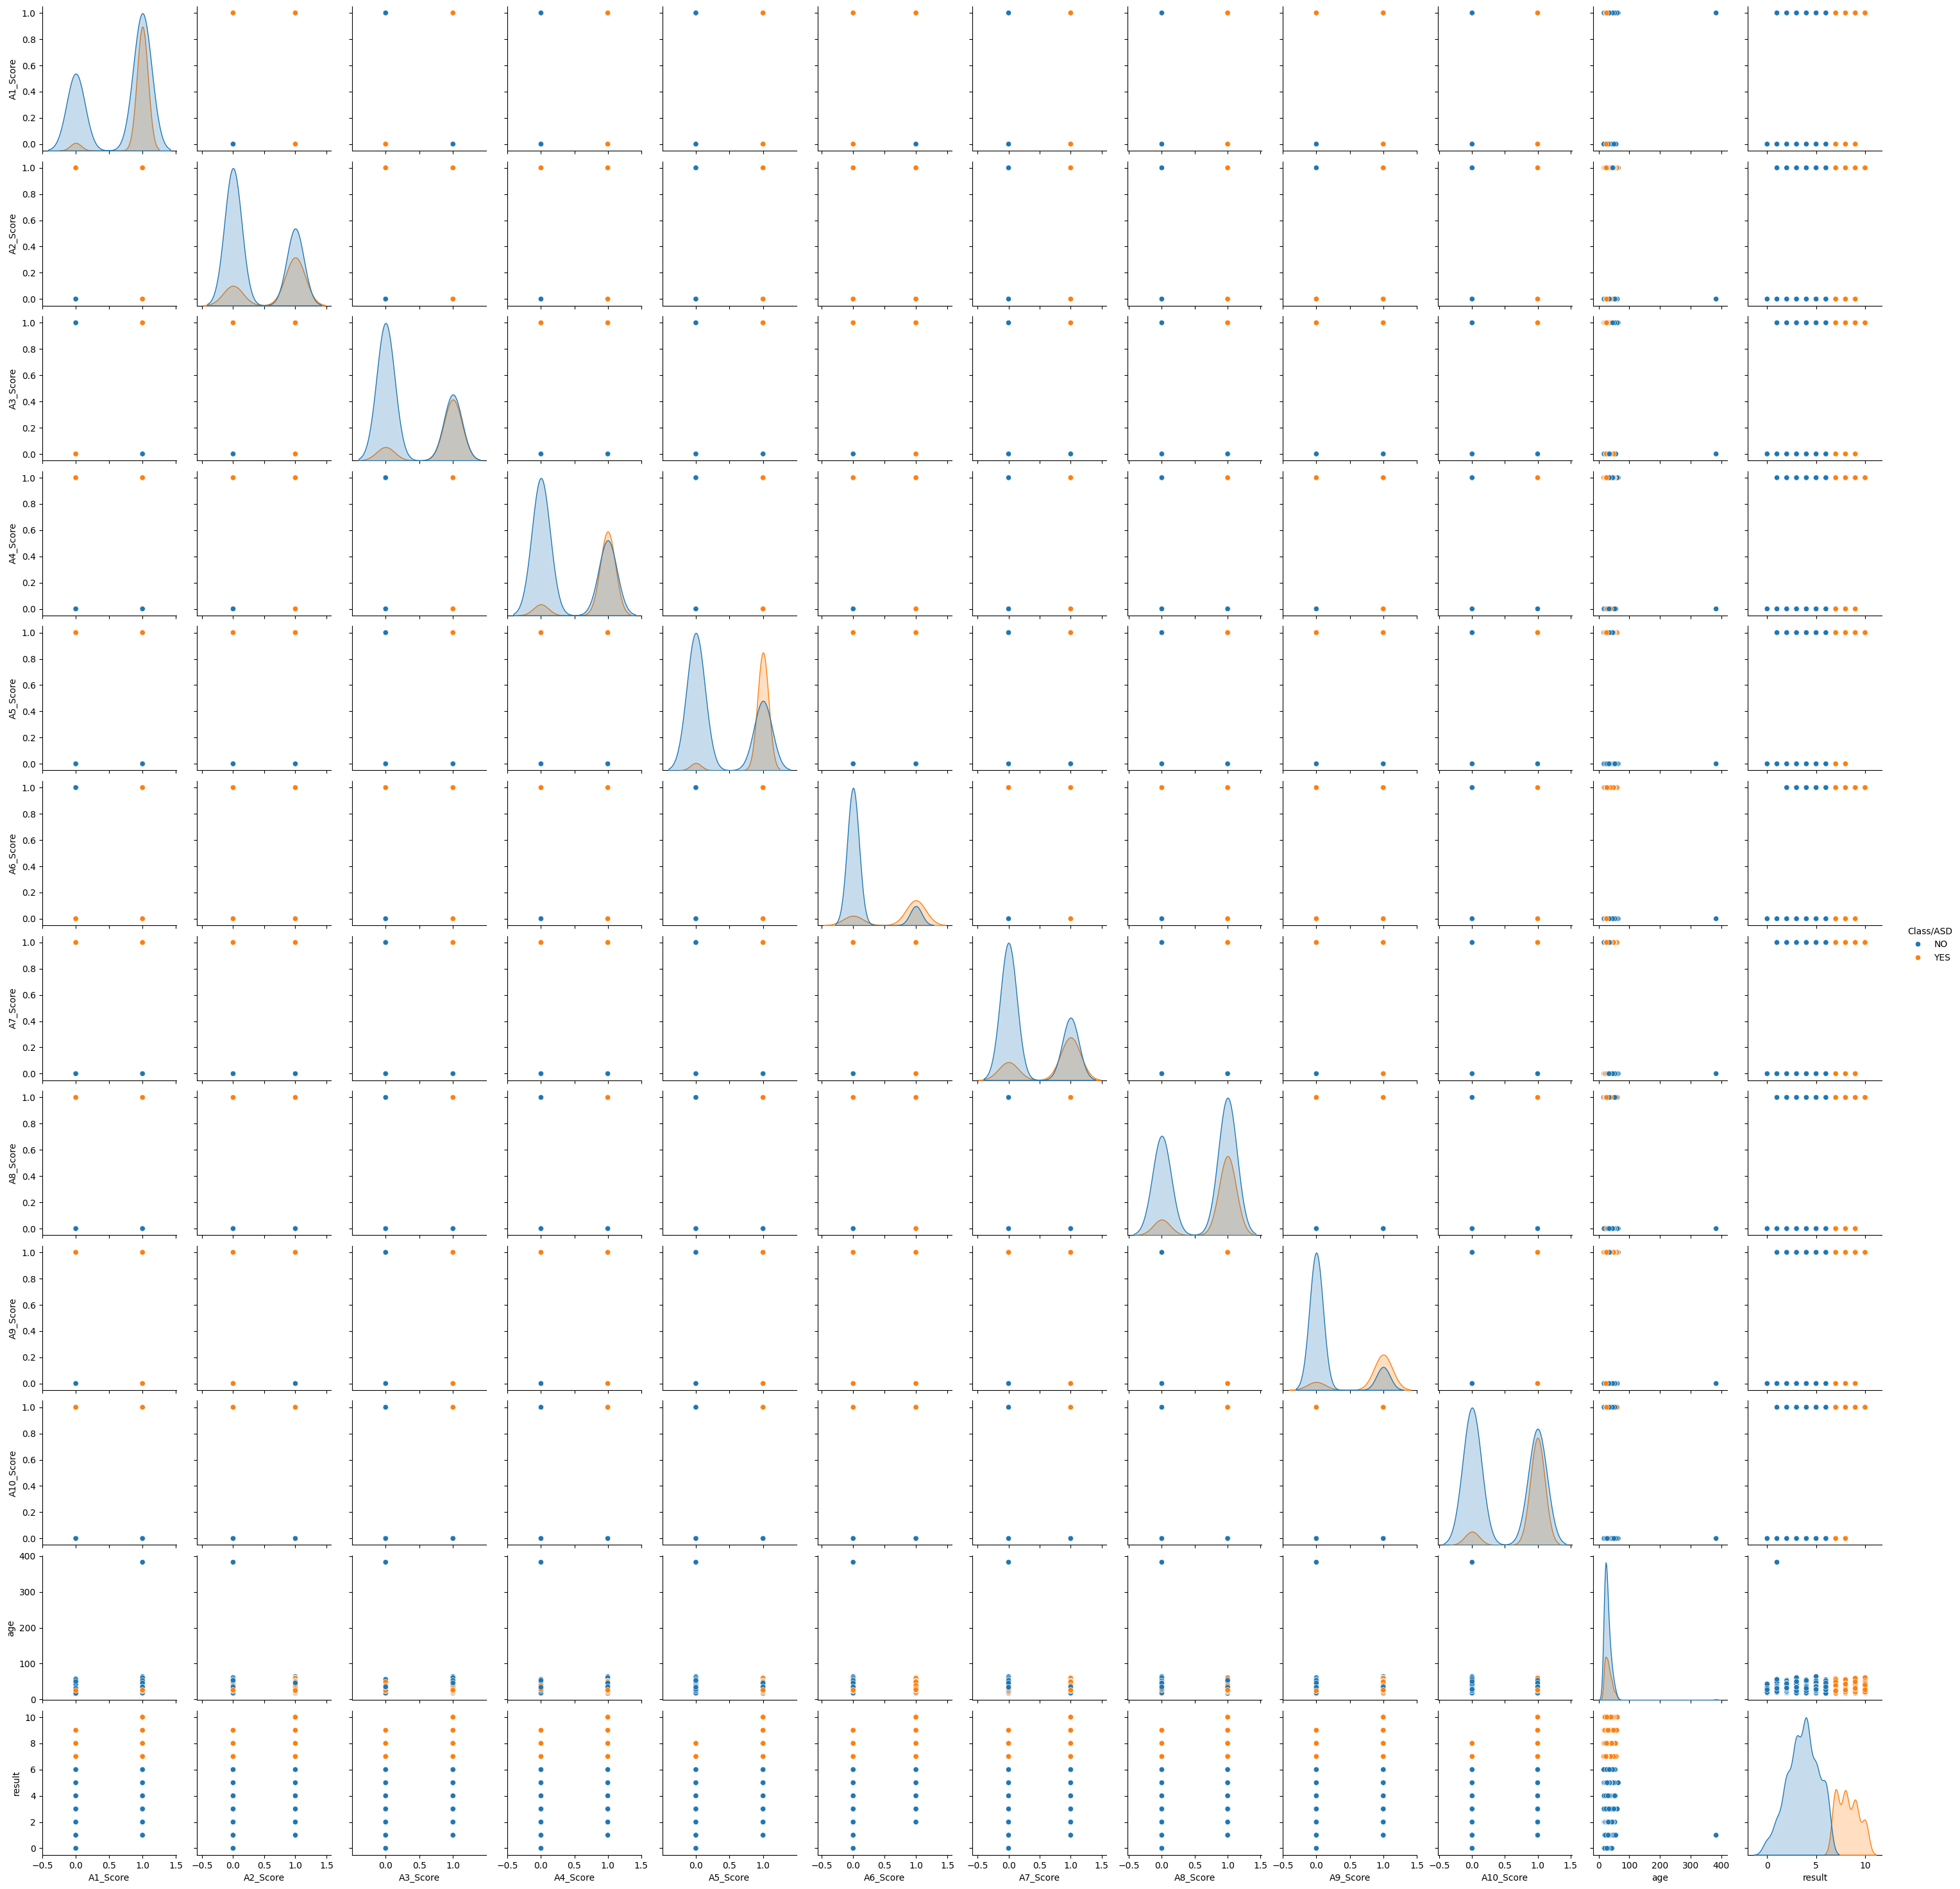

In [ ]:
# Filtrar apenas colunas numéricas para calcular a correlação
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Distribuição das variáveis principais
sns.pairplot(data, hue='Class/ASD')



### Seleção de variáveis com base na Correlação
A partir dos gráficos anteriores, mostramos a relação entre todas as variáveis numéricas do dataset e a variável-alvo, observamos que algumas variáveis apresentaram uma correlação significativa com a variável alvo. Com base nessas informações, selecionamos as colunas que tiveram os maiores coeficientes de correlação. Isso nos ajuda a focar em variáveis que têm um impacto mais direto na previsão do diagnóstico de autismo.

### Colunas Selecionadas

*  As colunas selecionadas foram, ['result', 'A6_Score', 'A9_Score', 'A5_Score', 'A4_Score'], identificadas como aquelas que mais se correlacionariam com a presença ou ausência do diagnóstico de autismo (Class/ASD)
*   Utilizar variáveis com alta correlação é uma estratégia eficaz, pois essas variáveis são mais propensas a capturar as características que influenciam o resultado do diagnóstico, melhorando a performance do modelo.

### Conversão da variável Alvo

* A variável Class/ASD foi convertida em um formato binário (0 e 1), onde 'YES' é mapeado para 1 (indicando a presença de autismo) e qualquer outro valor (presumivelmente 'NO') é mapeado para 0. Essa transformação é necessária para que o modelo possa trabalhar com a variável alvo em um formato que ele entenda como categórica.

### One-Hot Encoding
* Caso exista colunas categóricas, se existirem, serão converidas em variáveis numéricas usando o método de one-hot encoding, isso é feito para garantir que o modelo possa processar todas as variáveis de forma apropiada, uma vez que muitos algorimos de aprendizado de máquina requerem entradas númericas.

### Divisão em conjuntos de treinamento e teste
* o dataset é divido em conjuntos de treinamento e teste, com 80% dos dados utilizados para treinar o modelo e 20% para testá-lo, essa divisão é importante para avaliar performance do modelo em dados que não foram usados durante o treinamento, o que ajuda a prevenir o overfitting.

### Normalização dos dados

* A normalização é realizada utilziando o StandardScaler. Esse passo, é fundamental especialmente em modelos que dependem de distâncias (como regreção, logística ou redes neurais), pois garante que todas as variáveis estejam na mesma escala. A normalização, melhora a convergencia do algoritmo de aprendizado e a perfomance do modelo em geral.





In [ ]:
# Seleção das variáveis de entrada relevantes
selected_features = ['result', 'A6_Score', 'A9_Score', 'A5_Score', 'A4_Score']
X = data[selected_features]

# Convertendo a variável alvo para formato binário
y = data['Class/ASD'].apply(lambda x: 1 if x == 'YES' else 0)

# Converte colunas categóricas em variáveis numéricas usando one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Divisão dos conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Função para o treinamento do modelo com parametros

Treina um modelo de rede neural usando os hiperparâmetros especificados e avalia sua precisão.

###Parâmetros:
**learning_rate: float**:
Define a taxa de aprendizado do otimizador Adam. Este parâmetro controla a magnitude das atualizações dos pesos do modelo em cada iteração durante o treinamento. Uma taxa de aprendizado adequada é crucial para garantir que o modelo converja de maneira eficiente e eficaz.

**batch_size: int:**
Especifica o número de amostras de dados que serão utilizadas em cada iteração durante o treinamento do modelo. Um tamanho de lote apropriado pode influenciar a velocidade de treinamento e a qualidade das atualizações dos pesos.

**epochs: int**:
Representa o número total de épocas, ou seja, o número de passagens completas pelo conjunto de dados durante o treinamento. Esse parâmetro determina quanto tempo o modelo será treinado, afetando sua capacidade de aprender padrões nos dados.

**layers: list of int**:
Uma lista que indica o número de neurônios em cada camada oculta da rede neural. A estrutura da rede, incluindo o número de camadas e neurônios, desempenha um papel fundamental na capacidade do modelo de capturar a complexidade dos dados.

### Retornos:
**acc: float**:
A precisão do modelo nas previsões realizadas sobre o conjunto de teste. Este valor indica a proporção de previsões corretas em relação ao total de previsões realizadas, servindo como uma métrica de desempenho do modelo.

**history: History**:
Um objeto que contém informações detalhadas sobre o treinamento do modelo, incluindo a evolução da perda e da precisão ao longo das épocas. Essa informação pode ser útil para visualizar o desempenho do modelo durante o treinamento e para identificar possíveis problemas, como sobreajuste.

**y_pred: numpy.ndarray**:  
As previsões geradas pelo modelo no conjunto de teste, representadas como valores binários (0 ou 1). Essas previsões indicam a classe estimada para cada amostra no conjunto de teste, permitindo a avaliação da eficácia do modelo em prever as categorias corretas.





In [ ]:
def train_model_with_params(learning_rate, batch_size, epochs, layers):
    # Criação do modelo
    model = Sequential()
    model.add(Dense(layers[0], input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(0.01)))

    for neurons in layers[1:]:
        model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(0.01)))
        model.add(Dropout(0.2))

    # Camada de saída
    model.add(Dense(1, activation='sigmoid'))  # Saída binária para classificação

    # Compilação do modelo
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

    # Early stopping para evitar sobreajuste
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Treinamento do modelo
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)

    # Previsões e cálculo da precisão
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    # Avaliação da precisão
    acc = accuracy_score(y_test, y_pred)

    # Debug: imprime a precisão e o formato de y_pred
    print(f"Predictions shape: {y_pred.shape}, Accuracy: {acc}")

    return acc, history, y_pred

# Teste de variações de hiperparâmetros
params = [
    {'learning_rate': 0.001, 'batch_size': 10, 'epochs': 50, 'layers': [16, 8]},
    {'learning_rate': 0.01, 'batch_size': 20, 'epochs': 100, 'layers': [32, 16]},
    {'learning_rate': 0.005, 'batch_size': 32, 'epochs': 75, 'layers': [24, 12]},
    {'learning_rate': 0.01,  'batch_size': 64, 'epochs': 150, 'layers': [32, 16, 8]},
    {'learning_rate': 0.001, 'batch_size': 16, 'epochs': 100, 'layers': [64, 32]},
]


# Avaliação e exibição dos resultados para cada combinação de parâmetros
for param in params:
    acc, history, y_pred = train_model_with_params(**param)
    print(f"Params: {param}, Accuracy: {acc}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predictions shape: (141, 1), Accuracy: 1.0
Params: {'learning_rate': 0.001, 'batch_size': 10, 'epochs': 50, 'layers': [16, 8]}, Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predictions shape: (141, 1), Accuracy: 1.0
Params: {'learning_rate': 0.01, 'batch_size': 20, 'epochs': 100, 'layers': [32, 16]}, Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Predictions shape: (141, 1), Accuracy: 1.0
Params: {'learning_rate': 0.005, 'batch_size': 32, 'epochs': 75, 'layers': [24, 12]}, Accuracy: 1.0
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predictions shape: (141, 1), Accuracy: 1.0
Params: {'learning_rate': 0.01, 'batch_size': 64, 'epochs': 150, 'layers': [32, 16, 8]}, Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predictions shape: (141, 1), Accuracy: 1.0
Params: {'learning_rate': 0.001, 'batch_size': 16, 'epochs': 100, 'layers': [64, 32]}, Accuracy: 1.0


#Gráfico de Desempenho do Modelo
Utilizaremos agora os resultados obtidos anteriormente para plotar o gráfico de acurácia do modelo durante o processo de treinamento e validação. Esse gráfico nos permitirá visualizar a evolução da acurácia ao longo das épocas, comparando o desempenho nos conjuntos de treinamento e teste. Ao analisar essa curva, podemos identificar possíveis sinais de overfitting ou underfitting, ajudando-nos a entender como o modelo está aprendendo os padrões dos dados. Essa análise visual é essencial para avaliar o nível de generalização do modelo e para guiar ajustes que possam melhorar seu desempenho em dados não vistos.


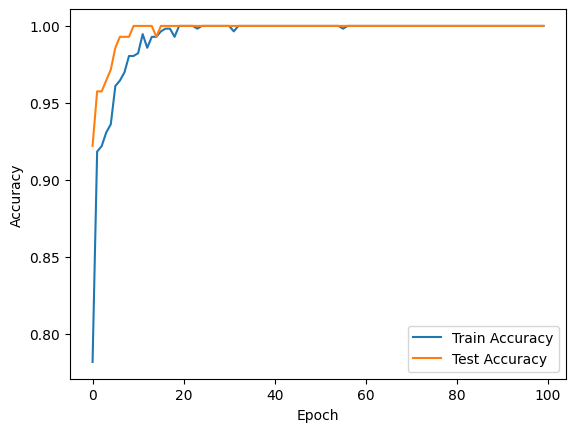

In [ ]:
# Gráfico de desempenho de cada modelo
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

No gráfico gerado, podemos observar as curvas de acurácia do modelo ao longo das épocas de treinamento, tanto para o conjunto de dados de treino quanto para o de teste. A curva azul representa a acurácia no conjunto de treinamento, enquanto a curva laranja mostra o desempenho do modelo no conjunto de teste.

A curva de teste atinge rapidamente valores próximos de 100%, estabilizando-se logo nas primeiras épocas e mantendo-se praticamente constante. Esse comportamento indica que o modelo consegue identificar padrões nos dados de teste rapidamente, acertando a maioria das previsões nesse conjunto. No entanto, a acurácia de treinamento continua aumentando de forma gradual, sugerindo que o modelo está se ajustando cada vez mais aos dados de treino.

#Treinamento e Avaliação do Modelo com Métricas de Desempenho

Nesta parte do código, os dados foram divididos em conjuntos de treino e teste, com 80% das amostras destinadas ao treinamento e 20% à avaliação final do modelo. Foi utilizada uma Regressão Logística para treinar o modelo no conjunto de treinamento, que é uma técnica comum e eficaz para problemas de classificação binária, especialmente quando interpretabilidade e simplicidade são desejáveis.

Em seguida, foi definido um limiar (threshold) de decisão para 0.2, o que significa que qualquer amostra com uma probabilidade de pertencer à classe positiva maior que 20% será classificada como positiva. Esse limiar é uma escolha que pode influenciar diretamente o desempenho em métricas como precisão, recall e F1-score.

In [ ]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defina e treine o modelo (com regressão logística)
model = LogisticRegression()
model.fit(X_train, y_train)

# Defina o limiar (threshold) desejado
threshold = 0.2  # ou 0.5, conforme preferir

# Verifique as dimensões de X_test e y_test
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Faça previsões e calcule as métricas
try:
    y_pred_probs = model.predict_proba(X_test)[:, 1]  # Probabilidades da classe positiva
    y_pred = (y_pred_probs > threshold).astype("int32")

    # Calcula as métricas de precisão, recall e F1
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Precisão: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

except Exception as e:
    print(f"An error occurred during prediction: {e}")


Shape of X_test: (141, 5)
Shape of y_test: (141,)
Precisão: 1.00, Recall: 1.00, F1-score: 1.00


O resultado obtido mostra que o modelo alcançou valores perfeitos para todas as métricas:


* Precisão: 1.00
* Recall: 1.00
* F1-score: 1.00


Esses valores indicam que o modelo classificou corretamente todas as amostras do conjunto de teste, sem cometer erros de classificação. Isso significa que, para todas as amostras positivas, o modelo as identificou como positivas (100% de recall) e que todas as previsões feitas como positivas estavam corretas (100% de precisão), resultando também em um F1-score perfeito.

Esse desempenho perfeito pode ser um indicativo de que o modelo se ajustou extremamente bem aos dados.

#Visualização das Curvas de Aprendizado do Modelo
Nesta parte do código, estamos visualizando o desempenho do modelo ao longo das épocas de treinamento, através das curvas de aprendizado. Utilizamos o histórico de precisão (accuracy) e precisão de validação (val_accuracy) armazenado durante o treinamento do modelo para gerar um gráfico que mostra a evolução da precisão em cada época. Este gráfico é uma ferramenta importante para observar como o modelo aprende com o tempo e para comparar o desempenho entre o conjunto de dados de treinamento e o de validação.

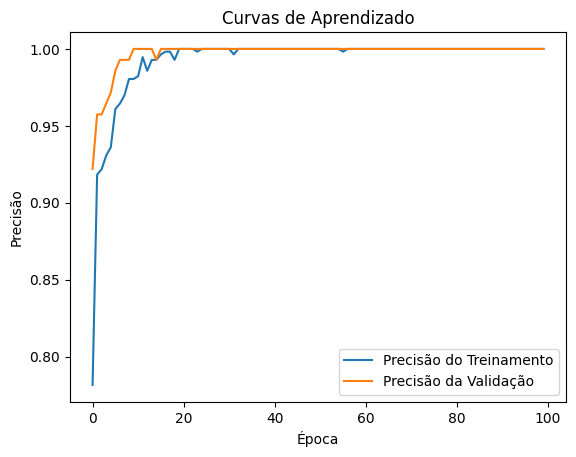

In [ ]:
import matplotlib.pyplot as plt

# Extrai o histórico de precisão do treinamento
train_accuracy = history.history['accuracy']
# Extrai o histórico de precisão da validação (teste)
val_accuracy = history.history['val_accuracy']

# Cria o gráfico
plt.plot(train_accuracy, label='Precisão do Treinamento')
plt.plot(val_accuracy, label='Precisão da Validação')
plt.title('Curvas de Aprendizado')
plt.xlabel('Época')
plt.ylabel('Precisão')
plt.legend()
plt.show()

Na imagem, observamos que a precisão do treinamento e da validação aumenta rapidamente nas primeiras épocas, atingindo quase 100% de precisão em ambas as curvas. Esse resultado indica que o modelo conseguiu aprender os padrões dos dados de forma eficiente e rapidamente.

A precisão de validação estabiliza em torno de 100% após poucas épocas, o que indica que o modelo está generalizando bem para o conjunto de validação, ou seja, ele não está apenas "decorando" os dados de treinamento, mas conseguindo prever corretamente em dados que ele não viu durante o treinamento.

#Análise de Desempenho do Modelo com a Matriz de Confusão
Nesta parte do código, estamos utilizando uma matriz de confusão para avaliar o desempenho do modelo no conjunto de teste. A matriz de confusão mostra a relação entre as previsões feitas pelo modelo e os rótulos reais do conjunto de teste, o que ajuda a identificar o número de acertos e erros em cada classe. O código utiliza a função confusion_matrix para calcular a matriz de confusão e, em seguida, ConfusionMatrixDisplay para exibir o resultado visualmente.

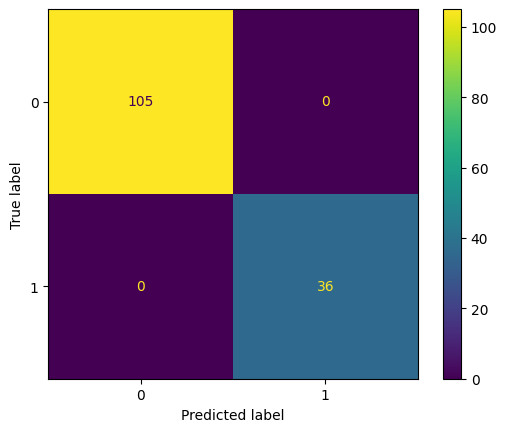

In [ ]:
# Calcula a matriz de confusão com y_pred do último modelo treinado
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Na imagem da matriz de confusão, observamos que o modelo teve um desempenho perfeito:

* 105 acertos na classe negativa (0): Todas as instâncias que pertencem à classe negativa foram corretamente classificadas.
* 36 acertos na classe positiva (1): Todas as instâncias da classe positiva também foram corretamente classificadas.

Não houve falsos positivos (previsões de 1 para instâncias que são realmente 0) nem falsos negativos (previsões de 0 para instâncias que são realmente 1), indicando um desempenho ideal do modelo para este conjunto de teste. Este resultado confirma que o modelo conseguiu separar as duas classes com precisão.

#Avaliação do Desempenho do Modelo com Métricas de Acurácia, F1 Score e Recall
Por ultimo, nesta parte do código, estamos definindo uma função chamada evaluate_model para avaliar o desempenho do modelo utilizando três métricas principais: acurácia, F1 score e recall. A função recebe os valores reais (y_test) e as previsões do modelo (y_pred), calcula essas métricas e exibe os resultados. Essas métricas fornecem uma visão abrangente da eficácia do modelo:

Acurácia mede a proporção de previsões corretas.
F1 score é a média harmônica entre precisão e recall, sendo útil para avaliar o equilíbrio entre essas duas métricas.
Recall mede a capacidade do modelo de identificar corretamente as instâncias positivas.
Após o treinamento do modelo com parâmetros específicos, ele faz previsões e utiliza a função evaluate_model para calcular e exibir as métricas.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")

    return accuracy, f1, recall

_, history, y_pred = train_model_with_params(**param)
evaluate_model(y_test, y_pred)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predictions shape: (141, 1), Accuracy: 1.0
Accuracy: 1.0000
F1 Score: 1.0000
Recall: 1.0000


(1.0, 1.0, 1.0)

Os resultados mostram que o modelo obteve acurácia, F1 score e recall perfeitos, com valores de 1.0000 para cada métrica. Isso indica que o modelo classificou corretamente todas as instâncias do conjunto de teste, tanto as positivas quanto as negativas. Esse desempenho ideal sugere que o modelo aprendeu a distinguir as classes com alta precisão, sem erros de classificação.